In [19]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [20]:
all_AVA_muts = pd.read_pickle("../data/ava/4_10_with_uniq_midpts.pkl")
display(len(all_AVA_muts), all_AVA_muts.head())

5676

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,imodulons,imodulon links,EC numbers,EC number links,products,product links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'NagC': ['ECK125162049'], 'PhoP': ['ECK125162...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,"[{'name': 'NagC/TyrR', 'significantly associat...",{'NagC/TyrR': ['nagBAC-umpH']},"[{'name': '3.5.1.25', 'significantly associate...","{'3.5.1.25': ['ECK125162049', 'ECK125162049']}",[{'name': 'N-acetylglucosamine-6-phosphate dea...,{'N-acetylglucosamine-6-phosphate deacetylase ...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,[],{},[],{},[],{},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'purR-KO', 'significantly associated...","{'purR-KO': ['rph-pyrE', 'rph-pyrE']}","[{'name': '2.4.2.10', 'significantly associate...","{'2.4.2.10': ['ECK120014627', 'ECK120014627']}",[{'name': 'Orotate phosphoribosyltransferase (...,{'Orotate phosphoribosyltransferase (EC 2.4.2....,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},"[{'name': 'translation', 'significantly associ...",{'translation': ['rplKAJL-rpoBC']},"[{'name': '2.7.7.6'

In [21]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_mut_size

# disregarding all deletions of size > 1000 bp (about the size of a gene) since these mutations don't contribute to design and only inflate mutation counts to systems leading to false positives.
all_AVA_muts["mutation size"] = all_AVA_muts.apply(get_mut_size, axis=1)
all_AVA_muts = all_AVA_muts[~((all_AVA_muts["Mutation Type"]=="DEL") & (all_AVA_muts["mutation size"]>1000))].copy()
len(all_AVA_muts)

5617

In [22]:
all_AVA_muts["exp ale"] = all_AVA_muts.apply(lambda m: m["exp"] + ' ' + str(int(m["ale"])), axis=1)

In [23]:
FEATURE_TYPES = [
    "genomic features",
    "operons",
    "pathways",
#     "imodulons",
    "regulators",
#     "EC numbers",
#     "products"
]

In [24]:
# # preprocessing
# ft_feat_d = {ft:dict() for ft in FEATURE_TYPES}
# for _, m in all_AVA_muts.iterrows():
#     for ft in FEATURE_TYPES:
#         for f in m[ft]:
#             if (str(f["name"]) != "nan") & (f["name"] not in feat_pen_d[ft].keys()):
#                 feat_pen_d[ft][f["name"]] = []
# # ft_feat_d

In [25]:
def get_expanded_feat_type(given_feat_type, feat_d):
    ft = given_feat_type
    if ft == "genomic features":
        ft = feat_d["feature type"]
        if ft == "unknown":
            ft = "intergenic" 
    
    return ft

In [26]:
# preprocessing
# ft_feat_d = {ft:dict() for ft in FEATURE_TYPES}
ft_feat_d = {}
for _, m in all_AVA_muts.iterrows():
    for ft in FEATURE_TYPES:
        for f in m[ft]:
            
            out_ft = get_expanded_feat_type(ft, f)
            if out_ft not in ft_feat_d.keys():  # Since ft_feat_d is empty by default, need to add first dict layer before adding 2nd layer for specific feature
                    ft_feat_d[out_ft] = {}
            
            if (str(f["name"]) != "nan") & (f["name"] not in ft_feat_d[out_ft].keys()):
                ft_feat_d[out_ft][f["name"]] = []
ft_feat_d.keys()

dict_keys(['gene', 'operons', 'pathways', 'regulators', 'attenuator terminator', 'intergenic', 'promoter', 'terminator', 'TFBS', 'RBS'])

In [27]:
# for exp, exp_mut_df in all_AVA_muts.groupby("exp"):
    
#     exp_feat_ale_d = {ft:dict() for ft in FEATURE_TYPES}
#     for _, m in exp_mut_df.iterrows():
#         z
#         for ft in FEATURE_TYPES:
#             for f in m[ft]:
#                 if str(f["name"]) != "nan":
#                     if f["name"] not in exp_feat_ale_d[ft].keys():
#                         exp_feat_ale_d[ft][f["name"]] = set()
#                     exp_feat_ale_d[ft][f["name"]].add(m["exp ale"])          
    
#     for ft in FEATURE_TYPES:
#         for f, feat_exp_ales in exp_feat_ale_d[ft].items():
#             feat_exp_pen = len(feat_exp_ales) / len(exp_mut_df["exp ale"].unique())
#             if feat_exp_pen > 0:
#                 ft_feat_d[ft][f].append(feat_exp_pen)

In [28]:
import copy
feat_pen_d = copy.deepcopy(ft_feat_d)

for exp, exp_mut_df in all_AVA_muts.groupby("exp"):
    
#     exp_feat_ale_d = {ft:dict() for ft in FEATURE_TYPES}
    exp_feat_ale_d = dict()
    for _, m in exp_mut_df.iterrows():
        
        for ft in FEATURE_TYPES:  # must use regular feature types since the mutation rows don't differentiate between sub "genomic feature" types (gene, TFBS, etc)
            for f in m[ft]:
                
                updt_ft = get_expanded_feat_type(ft, f)
                if updt_ft not in exp_feat_ale_d.keys():  # Since feat_pen_d is empty by default, need to add first dict layer before adding 2nd layer for specific feature
                    exp_feat_ale_d[updt_ft] = {}
                
                if str(f["name"]) != "nan":  # Maybe test for this earlier in the iteration to avoid unnecessary executions.
                    if f["name"] not in exp_feat_ale_d[updt_ft].keys():
                        exp_feat_ale_d[updt_ft][f["name"]] = set()
                    exp_feat_ale_d[updt_ft][f["name"]].add(m["exp ale"])          
#     display(exp_feat_ale_d)
    
    for updt_ft in exp_feat_ale_d.keys():
        for f, feat_exp_ales in exp_feat_ale_d[updt_ft].items():
            feat_exp_pen = len(feat_exp_ales) / len(exp_mut_df["exp ale"].unique())
            if feat_exp_pen > 0:
                feat_pen_d[updt_ft][f].append(feat_exp_pen)

# testing to make sure that all individual features are getting penetrance values
for ft, fd in feat_pen_d.items():
    for fn, pens in fd.items():
        assert(len(pens) > 0)                

# feat_pen_d

In [29]:
# from statistics import median

feat_avg_pen_d = {ft:dict() for ft in feat_pen_d.keys()}
for ft in feat_pen_d.keys():
    for f, pens in feat_pen_d[ft].items():
#         feat_avg_pen_d[ft][f] = median(pens)
        feat_avg_pen_d[ft][f] = sum(pens) / len(pens)
# feat_avg_pen_d

In [30]:
# I want sets for counting unique experiments
import copy
feat_exp_d = copy.deepcopy(ft_feat_d)
for d in feat_exp_d.values():
    for k, v in d.items():
        d[k] = set()
# feat_exp_d

for _, m in all_AVA_muts.iterrows():
    for ft in FEATURE_TYPES:  # must use regular feature types since the mutation rows don't differentiate between sub "genomic feature" types (gene, TFBS, etc)
        for f in m[ft]:
            if str(f["name"]) != "nan":
                updt_ft = get_expanded_feat_type(ft, f)
                feat_exp_d[updt_ft][f["name"]].add(m["exp"])
# feat_exp_d

In [31]:
mat = pd.DataFrame()
for _, m in all_AVA_muts.iterrows():
    for ft in FEATURE_TYPES:
        links_already_counted_for = set()
        for f in m[ft]:  # must use regular feature types since the mutation rows don't differentiate between sub "genomic feature" types (gene, TFBS, etc)
            if str(f["name"]) != "nan":  # !!! only counting features with names. This could lead to slightly inaccurate results.
                
                mat_index = str(f["name"])
                updt_ft = get_expanded_feat_type(ft, f)
                if ft != "genomic features":
                    mat_index = mat_index + ' ' + updt_ft[:-1]
                
                # columns that can be immediately populated
                if mat_index not in mat.index:
                    avg_pen = feat_avg_pen_d[updt_ft][f["name"]]
                    srs = pd.Series({
                        "feature type": updt_ft,
                        "experiment count": len(feat_exp_d[updt_ft][f["name"]]),
                        "average convergence": avg_pen,  # only needs to be recorded once
                        "ALE-unique mutation count": 0})  # setting up for later cells to populate
                    srs.name = mat_index
                    mat = mat.append(srs)
                
                if ft == "genomic features":
                    mat.at[mat_index, "ALE-unique mutation count"] += 1 # add count every time come across feature type
                else:  # have to count their links, not simply the occurence.
                    if f['name'] not in links_already_counted_for:  # so as to not double-count feature links
                        links_already_counted_for.add(f['name'])
                        links_col = ft[:-1] + " links"
                        link_key = f['name']
                        if ft == "operons":
                            link_key = f['RegulonDB ID']

                        try:
                            mat.at[mat_index, "ALE-unique mutation count"] += len(m[links_col][link_key]) # add count every time come across feature type
                        except:
                            display(link_key, m[ft], m[links_col])  # Any output from this should be addressed by ASW-2254
                        
mat.index = mat.apply(lambda r: str(r.name).replace("regulator", "regulon") if r["feature type"] == "regulators" else r.name, axis=1)  # some products have "regulator" in their name
mat['experiment count'] = mat['experiment count'].astype(int)
mat['ALE-unique mutation count'] = mat['ALE-unique mutation count'].astype(int)
mat

'ECK120014729'

[{'name': 'gltBDF',
  'RegulonDB ID': 'ECK120014729',
  'range': (3354148, 3361940),
  'significantly associated conditions': set()}]

{}

'FNR'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

'Nac'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

'AdiY'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

'Fur'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

'HdfR'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

'CRP'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

'Lrp'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

'GadE'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

'ArgR'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

'IHF'

[{'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Lrp', 'significantly associated conditions': {'NH4Cl(1)'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()}]

{}

,ALE-unique mutation count,average convergence,experiment count,feature type
nagA,10,0.243452,6,gene
nagBAC-umpH operon,36,0.372348,11,operons
Galactose metabolism pathway,79,0.423115,18,pathways
Amino sugar and nucleotide sugar metabolism pathway,73,0.396440,24,pathways
PhoP regulon,66,0.321222,23,regulators
...,...,...,...,...
ydiK,1,0.500000,1,gene
ydiK operon,1,0.500000,1,operons
csrA,1,0.500000,1,gene
csrA operon,1,0.500000,1,operons


In [32]:
def _get_percentile(r):
    ft_df = mat[mat["feature type"]==r["feature type"]]
    total_ft_set_len = len(ft_df)  # Each row is considered a unique feature (though this will be affected by bug of TFBS and RBS not having unique names (ASW-2145))
    feat_mut_cnt = r["ALE-unique mutation count"]
    ft_cnt_mut_less_than_given = len(ft_df[ft_df["ALE-unique mutation count"] < feat_mut_cnt])
    return ft_cnt_mut_less_than_given / total_ft_set_len


# srs = pd.Series({
#     "feature type": "gene",
#     "ALE-unique mutation count": 5})
# _get_percentile(srs)
mat["feature type percentile"] = mat.apply(lambda f: _get_percentile(f), axis=1)
mat

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile
nagA,10,0.243452,6,gene,0.947097
nagBAC-umpH operon,36,0.372348,11,operons,0.988254
Galactose metabolism pathway,79,0.423115,18,pathways,0.896000
Amino sugar and nucleotide sugar metabolism pathway,73,0.396440,24,pathways,0.872000
PhoP regulon,66,0.321222,23,regulators,0.878453
...,...,...,...,...,...
ydiK,1,0.500000,1,gene,0.000000
ydiK operon,1,0.500000,1,operons,0.000000
csrA,1,0.500000,1,gene,0.000000
csrA operon,1,0.500000,1,operons,0.000000


In [33]:
signif_logodds_assoc_mat_files = [
    "../data/assocs/geno_signif_logodds_assoc_mat.pkl",
    "../data/assocs/ops_signif_logodds_assoc_mat.pkl",
    "../data/assocs/pathway_signif_logodds_assoc_mat.pkl",
    "../data/assocs/regs_signif_logodds_assoc_mat.pkl",
]
mat["associated condition count"] = 0
for f in signif_logodds_assoc_mat_files:
    signif_logodds_assoc_mat = pd.read_pickle(f)
    for feat, r, in signif_logodds_assoc_mat.iterrows():
        
        feat_name = feat
#         if "geno_" in f:
#             feat_name += " genomic feature"
        if "ops_" in f:
            feat_name += " operon"
        if "pathway_" in f:
            feat_name += " pathway"
        if "regs_" in f:
            feat_name += " regulon"
        
        if feat_name in mat.index:
            mat.at[feat_name, "associated condition count"] = (r!=0).sum()
mat["associated condition count"] = mat["associated condition count"].astype(int)
mat

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count
nagA,10,0.243452,6,gene,0.947097,3
nagBAC-umpH operon,36,0.372348,11,operons,0.988254,11
Galactose metabolism pathway,79,0.423115,18,pathways,0.896000,8
Amino sugar and nucleotide sugar metabolism pathway,73,0.396440,24,pathways,0.872000,9
PhoP regulon,66,0.321222,23,regulators,0.878453,12
...,...,...,...,...,...,...
ydiK,1,0.500000,1,gene,0.000000,0
ydiK operon,1,0.500000,1,operons,0.000000,0
csrA,1,0.500000,1,gene,0.000000,0
csrA operon,1,0.500000,1,operons,0.000000,0


In [34]:
# Adjusting feature type names used
mat["feature type"] = mat["feature type"].astype(str)
mat["feature type"] = mat.apply(lambda r: r["feature type"].replace("regulator", "regulon") , axis=1)
mat["feature type"] = mat.apply(lambda r: r["feature type"][:-1] if r["feature type"][-1] == 's' else r["feature type"] ,axis=1)
mat["feature type"].unique()

array(['gene', 'operon', 'pathway', 'regulon', 'attenuator terminator',
       'intergenic', 'promoter', 'terminator', 'TFBS', 'RBS'],
      dtype=object)

In [35]:
mat["95th percentile\nmutation frequency\nfor feature type"] = mat.apply(lambda f: 1 if f["feature type percentile"] > 0.95 else 0, axis=1)
mat

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type
nagA,10,0.243452,6,gene,0.947097,3,0
nagBAC-umpH operon,36,0.372348,11,operon,0.988254,11,1
Galactose metabolism pathway,79,0.423115,18,pathway,0.896000,8,0
Amino sugar and nucleotide sugar metabolism pathway,73,0.396440,24,pathway,0.872000,9,0
PhoP regulon,66,0.321222,23,regulon,0.878453,12,0
...,...,...,...,...,...,...,...
ydiK,1,0.500000,1,gene,0.000000,0,0
ydiK operon,1,0.500000,1,operon,0.000000,0,0
csrA,1,0.500000,1,gene,0.000000,0,0
csrA operon,1,0.500000,1,operon,0.000000,0,0


In [36]:
def _get_ALE_uniq_prop_of_muts_for_feat_type(r):
    ALE_uniq_prop_of_muts_for_feat_type = 0
    
    feat_type = r["feature type"]
    feat = r.name
    ALE_uniq_prop_of_muts_for_feat_type = mat.at[feat,"ALE-unique mutation count"]/(mat[mat["feature type"]==feat_type]["ALE-unique mutation count"].sum())
    
    return ALE_uniq_prop_of_muts_for_feat_type
    

mat["proportion of mutations\nfor feature type"] = mat.apply(lambda r: _get_ALE_uniq_prop_of_muts_for_feat_type(r),axis=1)
mat

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type
nagA,10,0.243452,6,gene,0.947097,3,0,0.002151
nagBAC-umpH operon,36,0.372348,11,operon,0.988254,11,1,0.006048
Galactose metabolism pathway,79,0.423115,18,pathway,0.896000,8,0,0.019554
Amino sugar and nucleotide sugar metabolism pathway,73,0.396440,24,pathway,0.872000,9,0,0.018069
PhoP regulon,66,0.321222,23,regulon,0.878453,12,0,0.009582
...,...,...,...,...,...,...,...,...
ydiK,1,0.500000,1,gene,0.000000,0,0,0.000215
ydiK operon,1,0.500000,1,operon,0.000000,0,0,0.000168
csrA,1,0.500000,1,gene,0.000000,0,0,0.000215
csrA operon,1,0.500000,1,operon,0.000000,0,0,0.000168


In [37]:
# These annotations are for the gdmuts MS.
design_feats = [
    "CRP regulon",
    "glpFKX operon",
    "glpK",
    "cyaA operon",
    "cyaA",
    "ptsHI-crr operon",
    "crr",
    "pykF",
    "pykF operon",
    "Purine metabolism pathway",
    "rplKAJL-rpoBC operon",
    "rpoB",
    "rpoC",
    "nagA",
    "nagC",
    "nagBAC-umpH operon"
]
annot_df = mat[mat.index.isin(design_feats)].copy()
annot_df["annot"] = annot_df.index
annot_df["annot"] = annot_df.apply(lambda r: r["annot"].replace("genomic feature", ''), axis=1)
annot_df

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type,annot
nagA,10,0.243452,6,gene,0.947097,3,0,0.002151,nagA
nagBAC-umpH operon,36,0.372348,11,operon,0.988254,11,1,0.006048,nagBAC-umpH operon
CRP regulon,1048,0.764102,58,regulon,0.994475,8,1,0.152149,CRP regulon
rpoC,86,0.430928,31,gene,0.998065,16,1,0.018503,rpoC
rplKAJL-rpoBC operon,168,0.608954,41,operon,0.997651,23,1,0.028226,rplKAJL-rpoBC operon
Purine metabolism pathway,431,0.750035,48,pathway,0.984000,18,1,0.106683,Purine metabolism pathway
nagC,23,0.300298,10,gene,0.980000,12,1,0.004948,nagC
pykF operon,37,0.427106,13,operon,0.989037,11,1,0.006216,pykF operon
pykF,32,0.423701,11,gene,0.992903,11,1,0.006885,pykF
rpoB,75,0.438793,29,gene,0.997419,22,1,0.016136,rpoB


In [38]:
p = {
    'gene':"#72C4B3",
    'operon':"#A7A0CB",
    'pathway':"#F65E54",
    'regulon':"#FA9A47",
    'attenuator terminator':"#9BD44C",
    'intergenic':"#F9B8DA",
    'promoter':"#CAC9CA",
    'terminator':"#A35DA6",
    'TFBS':"#BAE4B0",
    'RBS':"#FFE953",
}

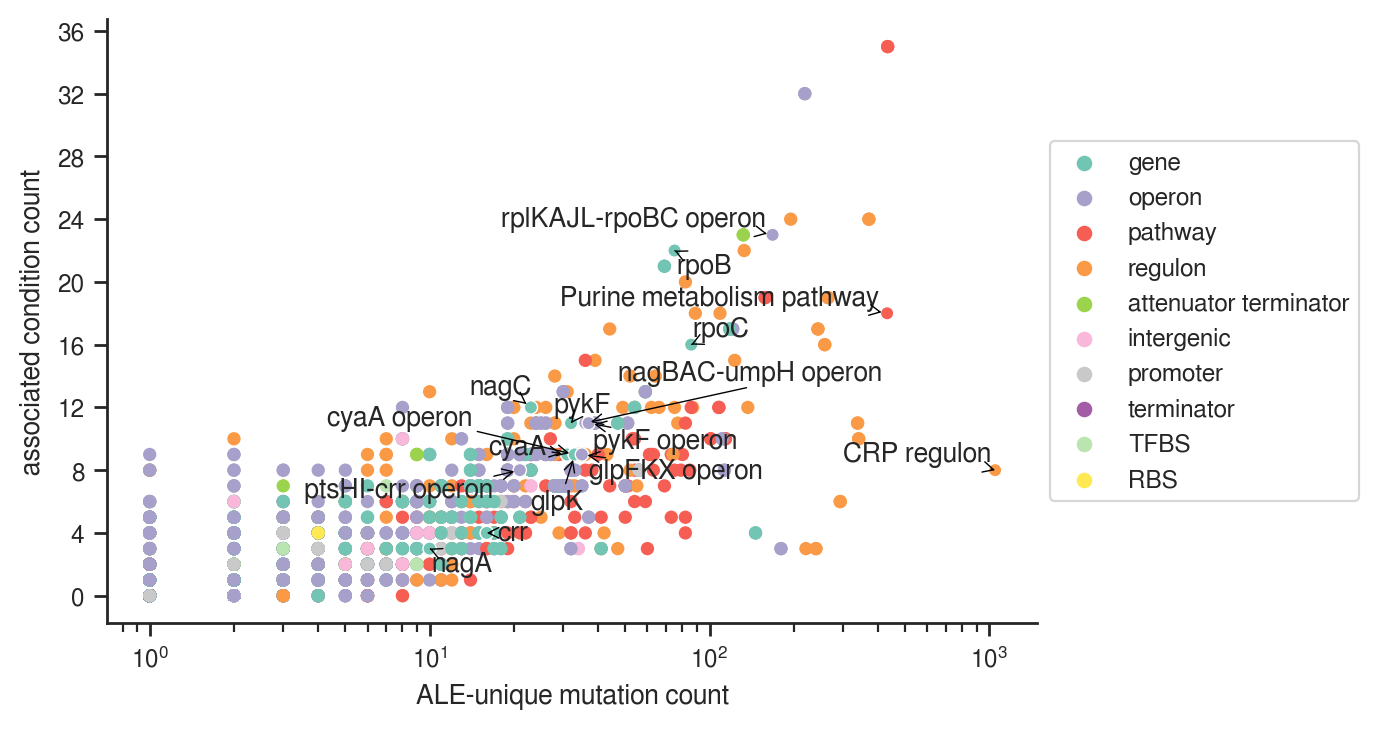

In [39]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.ticker import MaxNLocator
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


X_AXIS = "ALE-unique mutation count"
# X_AXIS = "average convergence"

# plt.figure(figsize=(4,3.5))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     size="ALE-unique mutation count",
    linewidth=0,
#     alpha=0.8,
#     sizes={0:10, 1:100},
#     sizes=(1, 100),
    palette=p,
    legend="full"
)

# To get the high-percentile dots plotted on the foreground
sns.scatterplot(
    data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
    linewidth=0,
#     alpha=0.8,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
    linewidth=0.5,
#     alpha=0.8,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df["associated condition count"].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

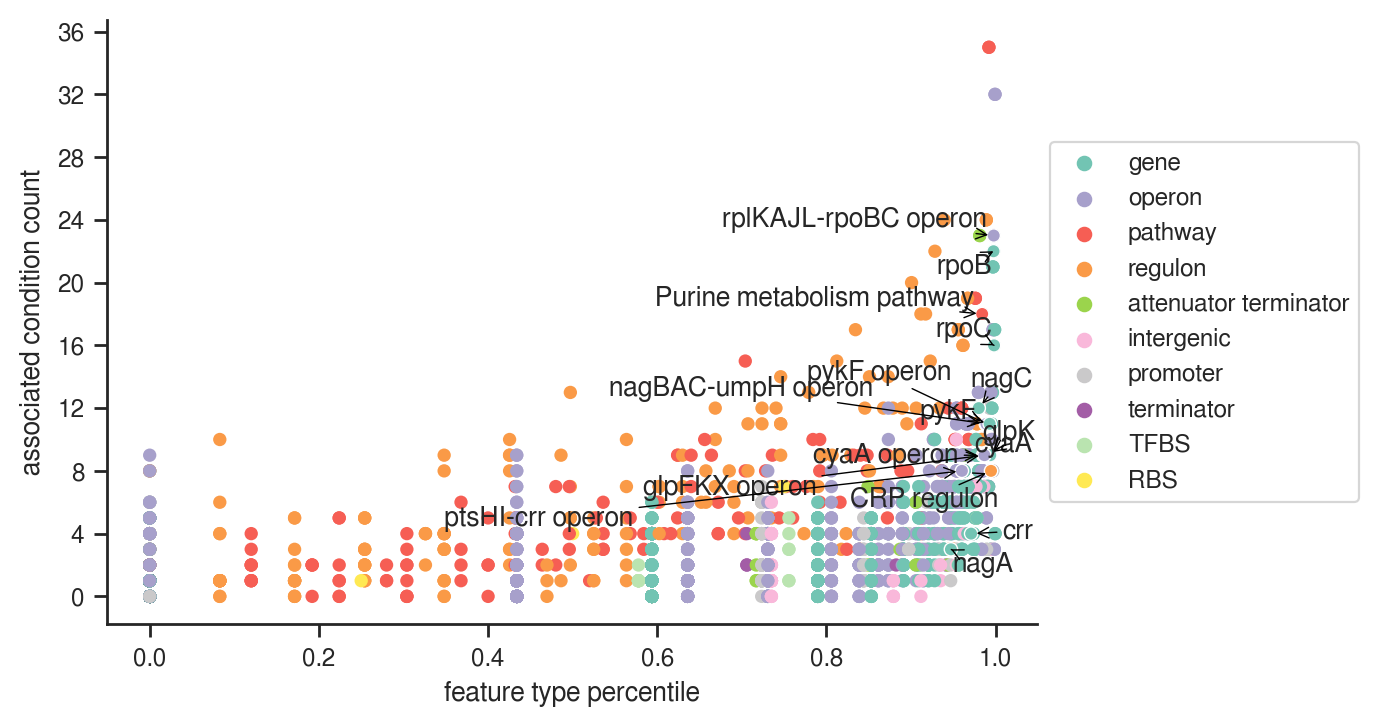

In [40]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


X_AXIS = "feature type percentile"
# X_AXIS = "average convergence"

# plt.figure(figsize=(4,3.5))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     size="ALE-unique mutation count",
    linewidth=0,
#     alpha=0.8,
#     sizes={0:10, 1:100},
#     sizes=(1, 100),
    palette=p,
    legend="full"
)

# To get the high-percentile dots plotted on the foreground
sns.scatterplot(
    data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
    linewidth=0,
#     alpha=0.8,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
    linewidth=0.5,
#     alpha=0.8,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df["associated condition count"].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

repel_force = 0.25
adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((repel_force, repel_force)),
            force_text=((repel_force, repel_force))
           )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Text(0.5, 42.83333333333333, 'average ALE experiment convergence')

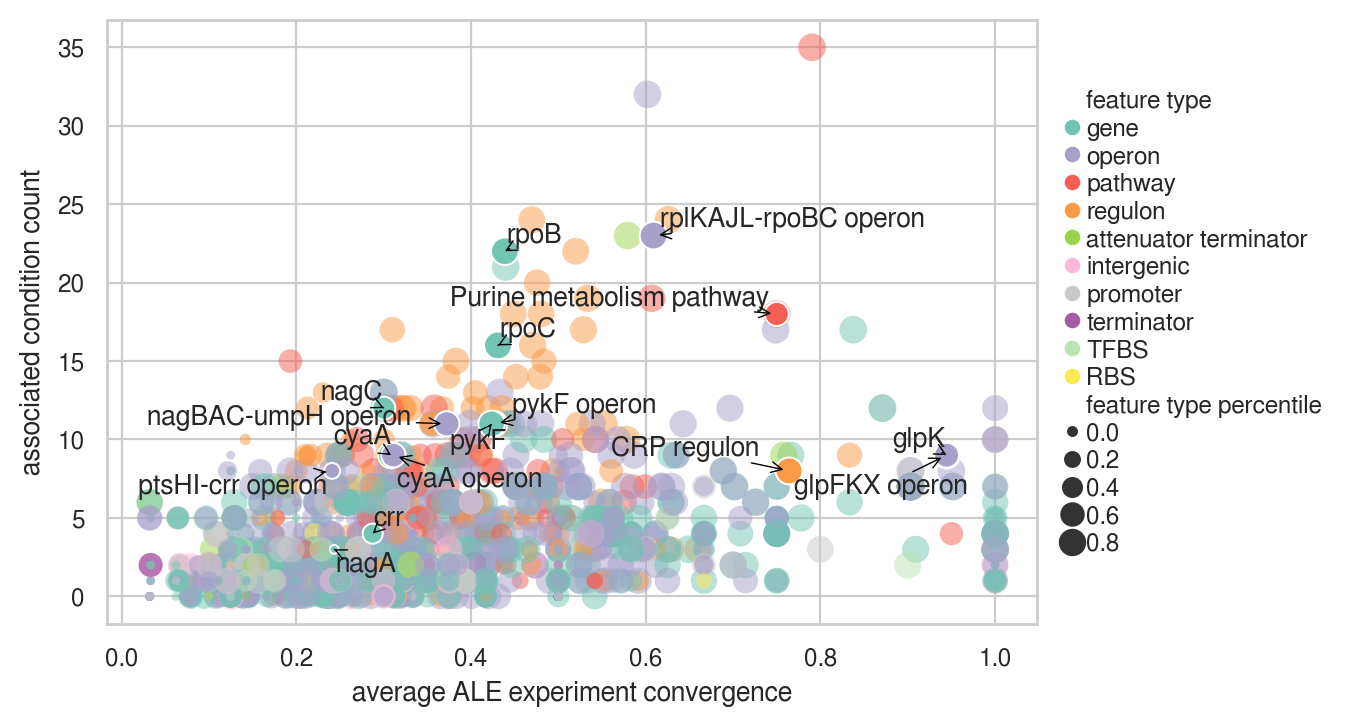

In [41]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


# X_AXIS = "ALE-unique mutation count"
X_AXIS = "average convergence"
# X_AXIS = "feature type percentile"
Y_AXIS = "associated condition count"
SIZE = "feature type percentile"
# SIZE = "average convergence"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)

# # To get the high-percentile dots plotted on the foreground
# sns.scatterplot(
#     data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
#     x=X_AXIS,
#     y="associated condition count",
#     hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     linewidth=0,
# #     alpha=0.8,
#     sizes={0:10, 1:100},
#     palette=p,
#     legend=False
# )

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.set_xlabel("average ALE experiment convergence")
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Text(0.5, 42.83333333333333, 'average ALE experiment convergence')

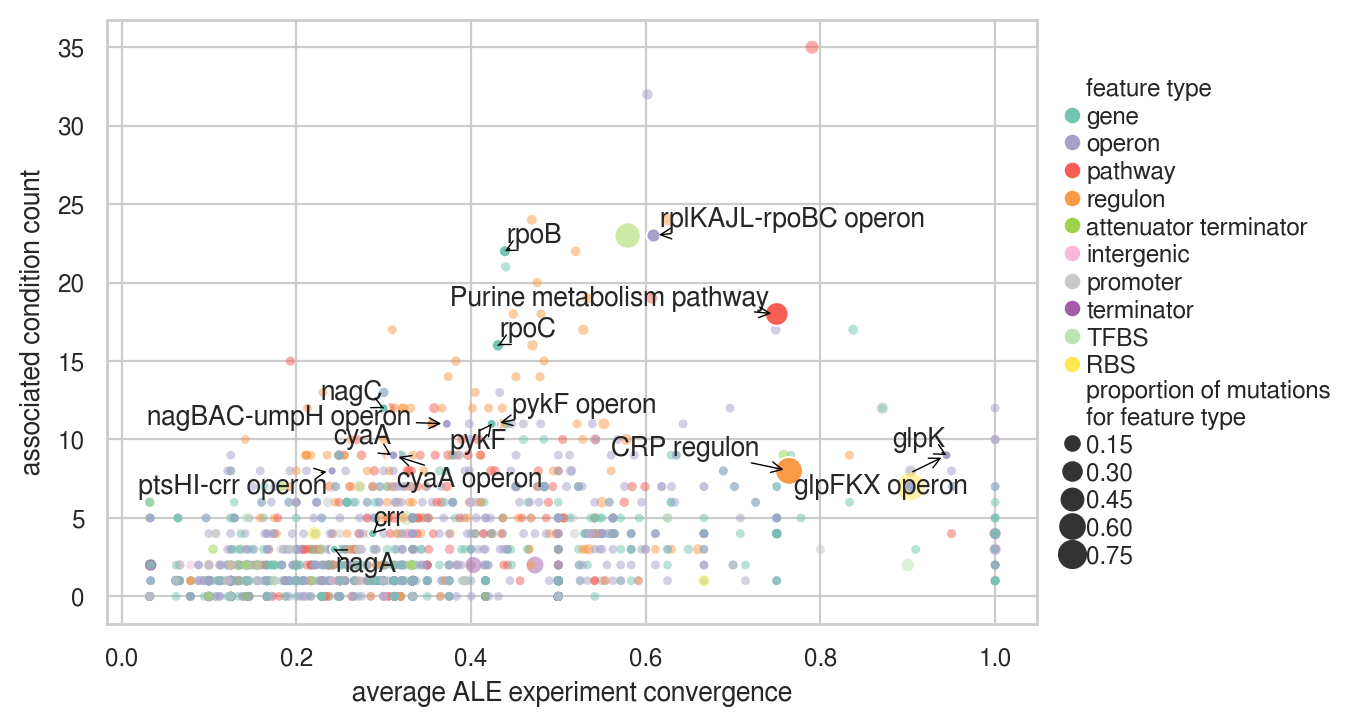

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


X_AXIS = "average convergence"
Y_AXIS = "associated condition count"
SIZE = "proportion of mutations\nfor feature type"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)

# # To get the high-percentile dots plotted on the foreground
# sns.scatterplot(
#     data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
#     x=X_AXIS,
#     y="associated condition count",
#     hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     linewidth=0,
# #     alpha=0.8,
#     sizes={0:10, 1:100},
#     palette=p,
#     legend=False
# )

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.set_xlabel("average ALE experiment convergence")
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Text(82.45833333333333, 0.5, 'average ALE experiment convergence')

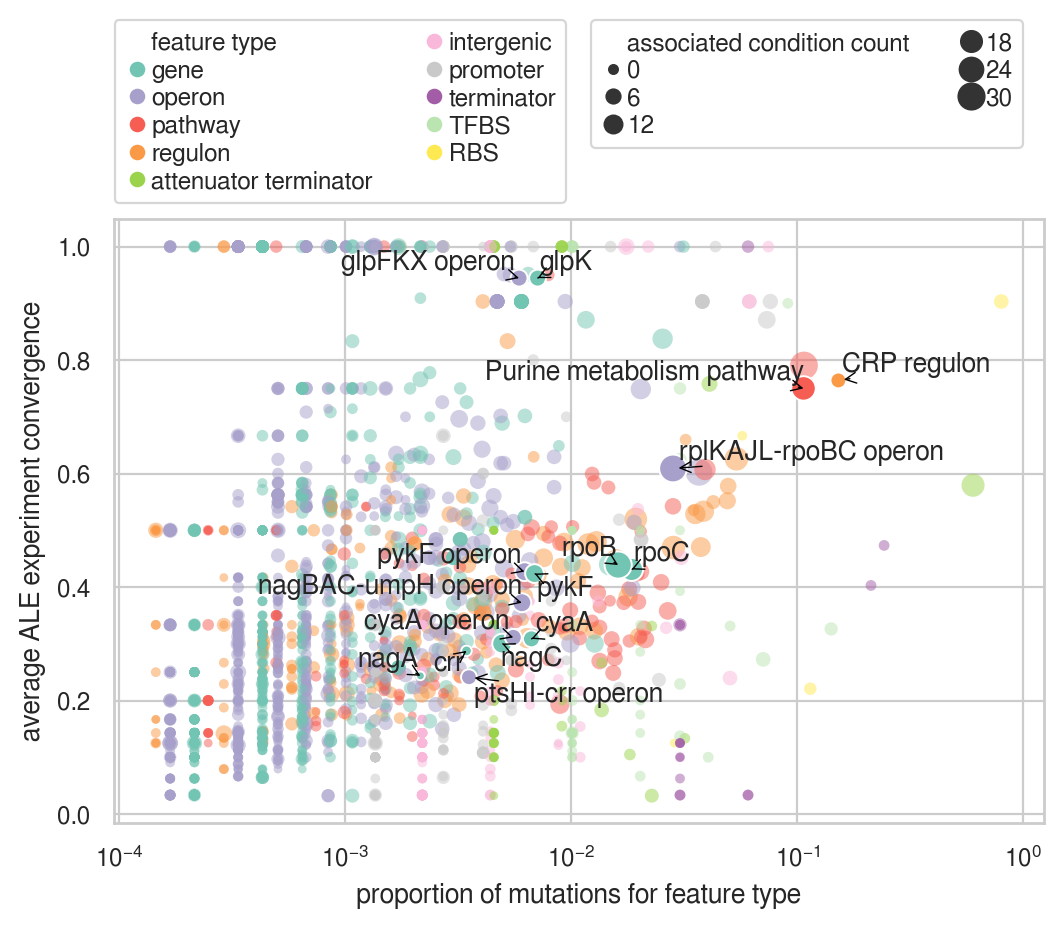

In [43]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "proportion of mutations\nfor feature type"
SIZE = "associated condition count"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)


# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)


plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.75, 0.75)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1

handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(
    handles[:11],
    labels[:11],
    ncol=2,
    loc='upper right',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
l2 = ax.legend(
    handles[11:],
    labels[11:],
    ncol=2,
    loc='upper left',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
ax.add_artist(l1)

# ax.legend(
#     loc='center left',
#     bbox_to_anchor=(1, 0.5),
#     frameon=False,
# )
# ax.legend(loc=5, bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel(X_AXIS.replace("\n", ' '))
ax.set_ylabel("average ALE experiment convergence")

Text(82.45833333333333, 0.5, 'average ALE experiment convergence')

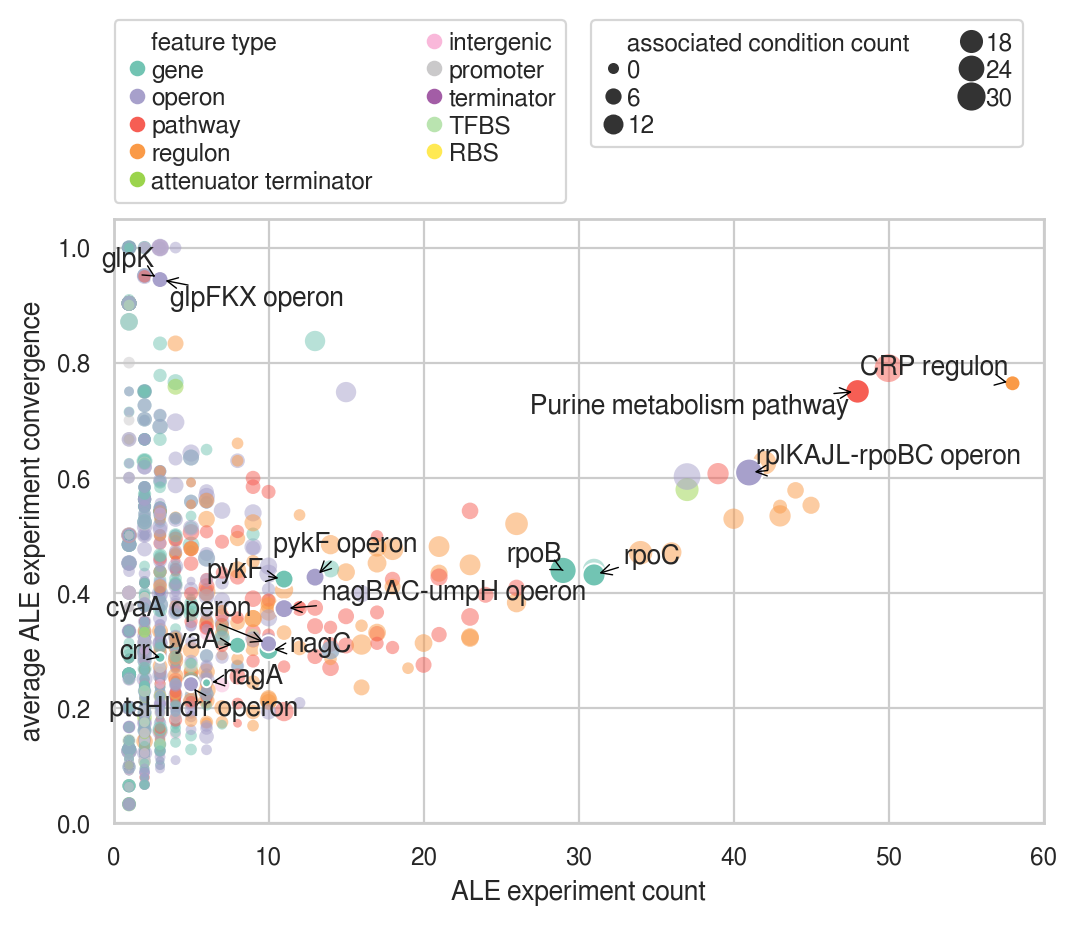

In [44]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "experiment count"
SIZE = "associated condition count"
sizes = (10,100)


plt.figure(figsize=(6,4))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)


# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)

# plt.xscale('log')

texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.75, 0.75)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1

handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(
    handles[:11],
    labels[:11],
    ncol=2,
    loc='upper right',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
l2 = ax.legend(
    handles[11:],
    labels[11:],
    ncol=2,
    loc='upper left',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
ax.add_artist(l1)
ax.set_xlim([0,60])
ax.set_ylim([0,1.05])
ax.set_xlabel("ALE experiment count")
ax.set_ylabel("average ALE experiment convergence")
# plt.savefig("../figs/gdmuts_f4.svg", format="svg", bbox_inches='tight')

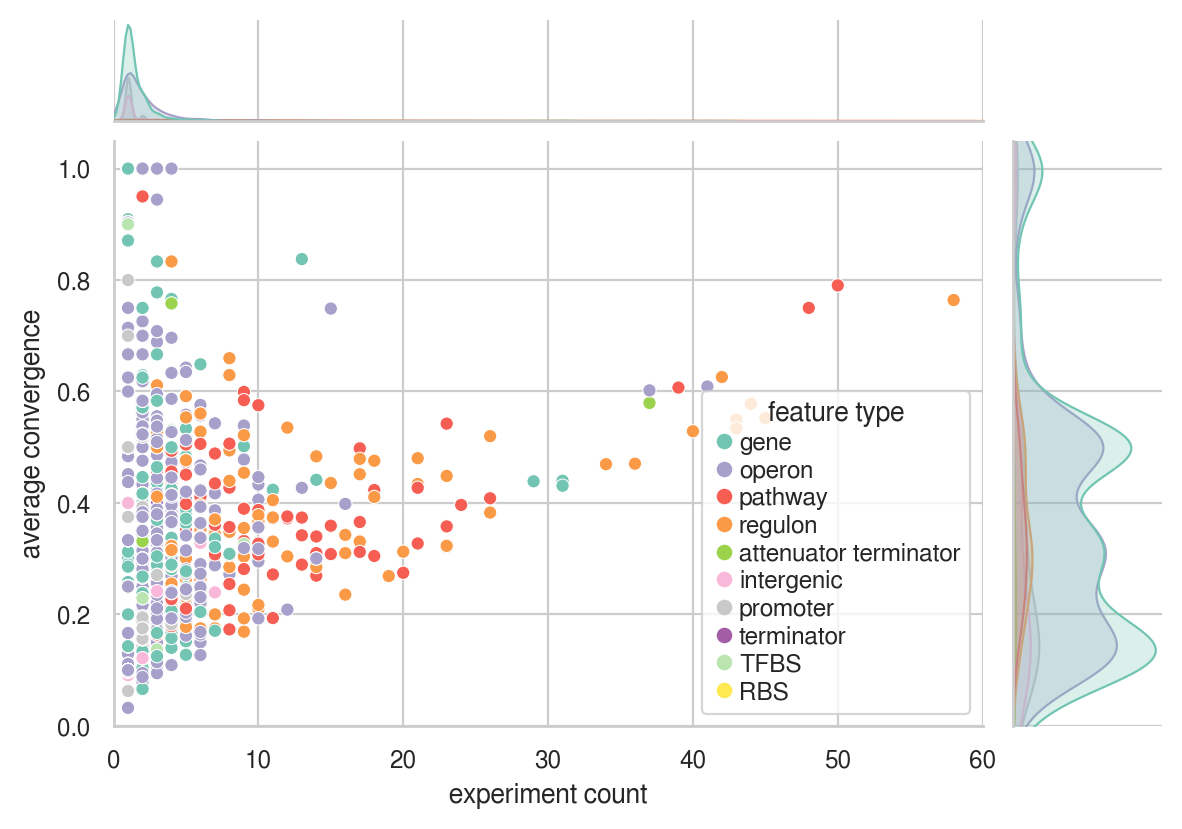

In [45]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "experiment count"
SIZE = "associated condition count"
# sizes = (10,100)

# plt.figure(figsize=(6,4))
jointgrid = sns.jointplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    palette=p,
)
jointgrid.ax_joint.set_xlim([0,60])
jointgrid.ax_joint.set_ylim([0,1.05])
jointgrid.fig.set_figwidth(6)
jointgrid.fig.set_figheight(4)

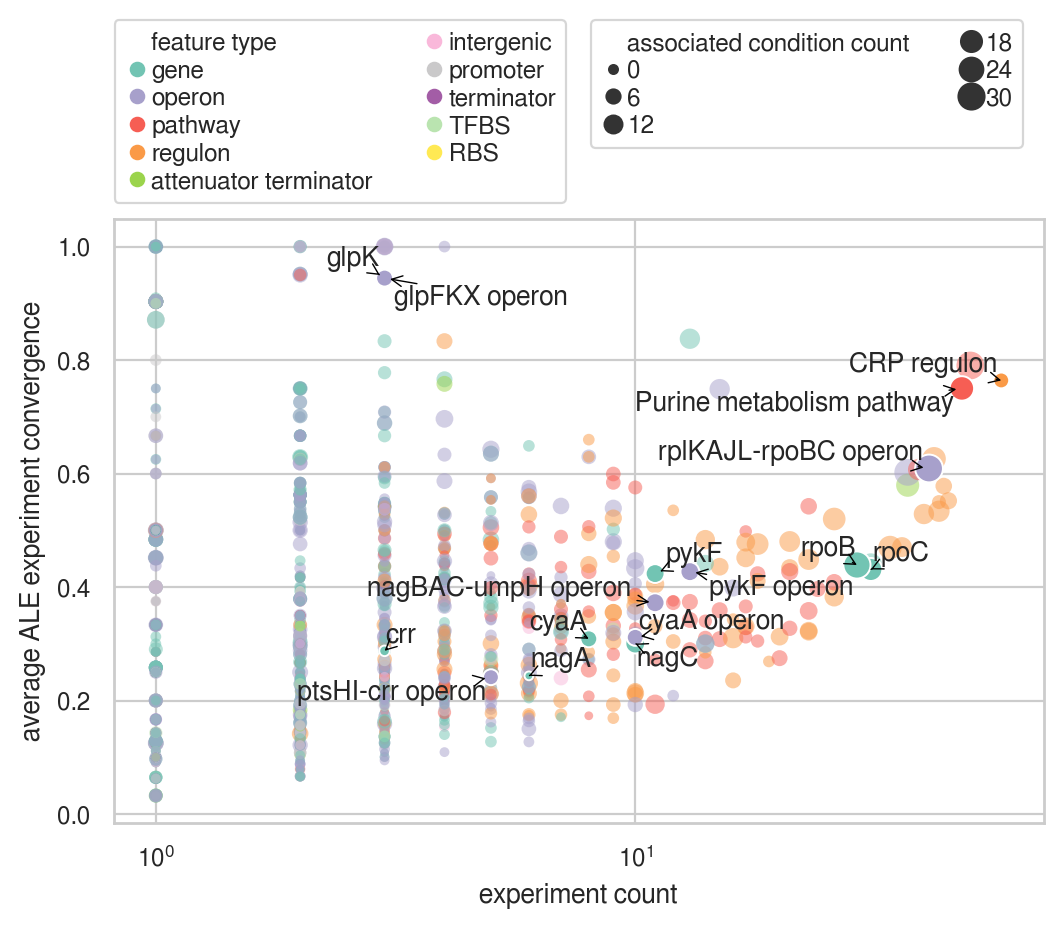

In [46]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "experiment count"
SIZE = "associated condition count"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)


# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)

plt.xscale('log')

texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.75, 0.75)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1

handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(
    handles[:11],
    labels[:11],
    ncol=2,
    loc='upper right',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
l2 = ax.legend(
    handles[11:],
    labels[11:],
    ncol=2,
    loc='upper left',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
ax.add_artist(l1)
ax.set_xlabel(X_AXIS.replace("\n", ' '))
ax.set_ylabel("average ALE experiment convergence")
plt.savefig("../figs/gdmuts_f4.svg", format="svg", bbox_inches='tight')

In [47]:
# To use to manually check what features have high experiment counts, though low average convergence. Useful for content in gdmuts MS section 2.2.3
mat[((mat["feature type"].isin(['operon','gene','attenuator terminator', 'intergenic', 'promoter', 'terminator', 'TFBS', 'RBS'])) & (mat["experiment count"]>=10))].sort_values(by="experiment count", ascending=True)

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type
yobF-cspC operon,39,0.446352,10,operon,0.990603,11,1,0.006552
metY-rimP-nusA-infB-rbfA-truB-rpsO-pnp operon,15,0.192857,10,operon,0.936570,8,0,0.002520
sapABCDF operon,25,0.356310,10,operon,0.967110,11,1,0.004200
nagC,23,0.300298,10,gene,0.980000,12,1,0.004948
mraZ-rsmH-ftsLI-murEF-mraY-murD-ftsW-murGC-ddlB-ftsQAZ-lpxC operon,19,0.294985,10,operon,0.953798,6,1,0.003192
hns operon,30,0.432976,10,operon,0.979640,13,1,0.005040
fimAICDFGH operon,16,0.317619,10,operon,0.944401,7,0,0.002688
rfe-wzzE-wecBC-rffGHC-wecE-wzxE-rffT-wzyE-rffM operon,37,0.405925,10,operon,0.989037,5,1,0.006216
cyaA operon,33,0.311230,10,operon,0.985121,9,1,0.005544
nagBAC-umpH operon,36,0.372348,11,operon,0.988254,11,1,0.006048


In [48]:
mat2 = mat.copy()
mat2 = mat2[mat2["feature type"].isin(['gene', 'attenuator terminator', 'intergenic', 'promoter', 'terminator', 'TFBS', 'RBS'])]
mat2["proportion of mutations"] = mat2.apply(lambda r: r["ALE-unique mutation count"]/mat2["ALE-unique mutation count"].sum(), axis=1)
mat2

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type,proportion of mutations
nagA,10,0.243452,6,gene,0.947097,3,0,0.002151,0.001606
clsA,4,0.237500,2,gene,0.852903,0,0,0.000861,0.000642
rph-pyrE attenuator terminator,132,0.579379,37,attenuator terminator,0.981132,23,1,0.600000,0.021198
rph,69,0.439811,31,gene,0.996774,21,1,0.014845,0.011081
rpoC,86,0.430928,31,gene,0.998065,16,1,0.018503,0.013811
...,...,...,...,...,...,...,...,...,...
cyoA,1,0.500000,1,gene,0.000000,0,0,0.000215,0.000161
potA,1,0.500000,1,gene,0.000000,0,0,0.000215,0.000161
ydiK,1,0.500000,1,gene,0.000000,0,0,0.000215,0.000161
csrA,1,0.500000,1,gene,0.000000,0,0,0.000215,0.000161


In [49]:
annot_df2 = mat2[mat2.index.isin(design_feats)].copy()
annot_df2["annot"] = annot_df2.index
annot_df2["annot"] = annot_df2.apply(lambda r: r["annot"].replace(" genomic feature", ''), axis=1)
annot_df2

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type,proportion of mutations,annot
nagA,10,0.243452,6,gene,0.947097,3,0,0.002151,0.001606,nagA
rpoC,86,0.430928,31,gene,0.998065,16,1,0.018503,0.013811,rpoC
nagC,23,0.300298,10,gene,0.980000,12,1,0.004948,0.003694,nagC
pykF,32,0.423701,11,gene,0.992903,11,1,0.006885,0.005139,pykF
rpoB,75,0.438793,29,gene,0.997419,22,1,0.016136,0.012044,rpoB
cyaA,31,0.308681,8,gene,0.992258,9,1,0.006670,0.004978,cyaA
glpK,33,0.944444,3,gene,0.993548,9,1,0.007100,0.005300,glpK
crr,16,0.287500,3,gene,0.970968,4,1,0.003442,0.002569,crr


Text(0.5, 40.133333333333326, 'proportion of mutations')

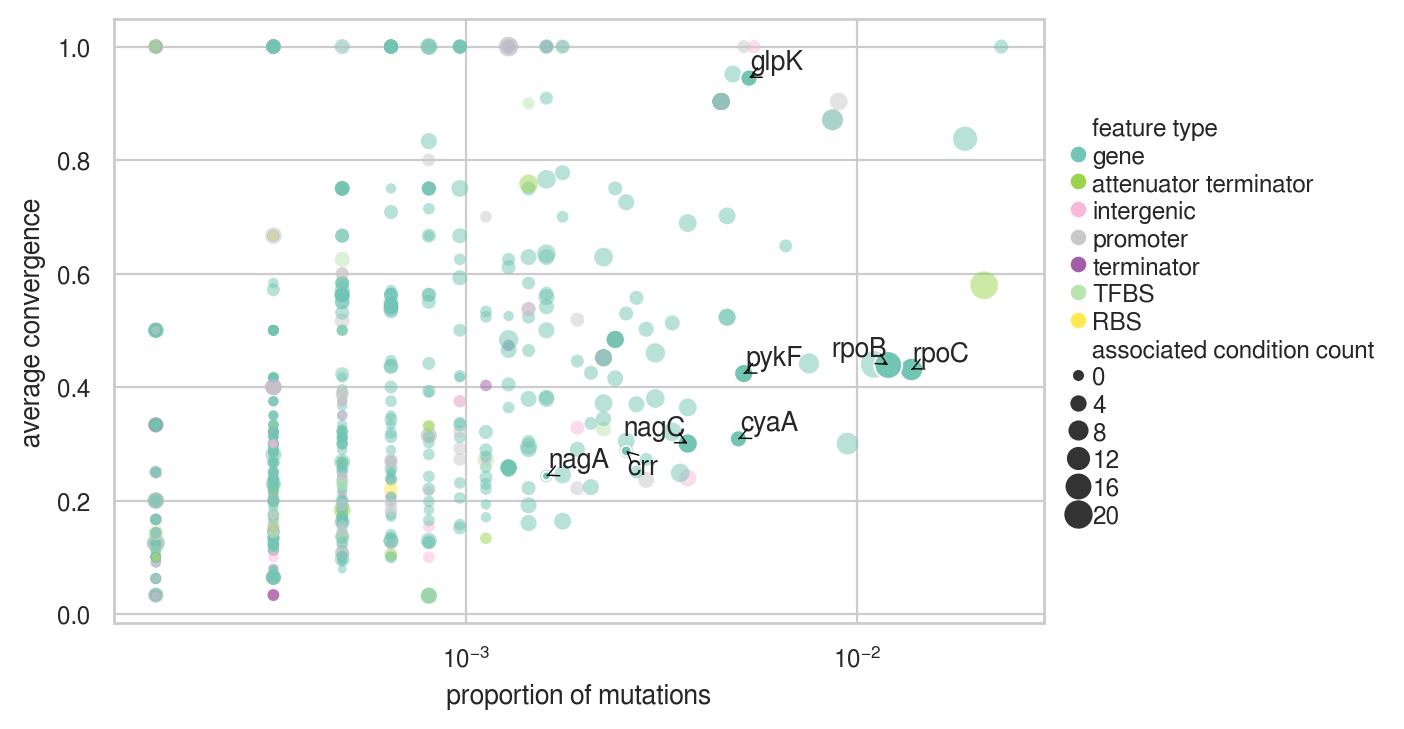

In [50]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "proportion of mutations"
SIZE = "associated condition count"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat2,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)


# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df2,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)


plt.xscale('log')


texts = []
for x, y, s in zip(annot_df2[X_AXIS].tolist(),
                   annot_df2[Y_AXIS].tolist(),
                   annot_df2["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.set_xlabel(X_AXIS.replace("\n", ' '))
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

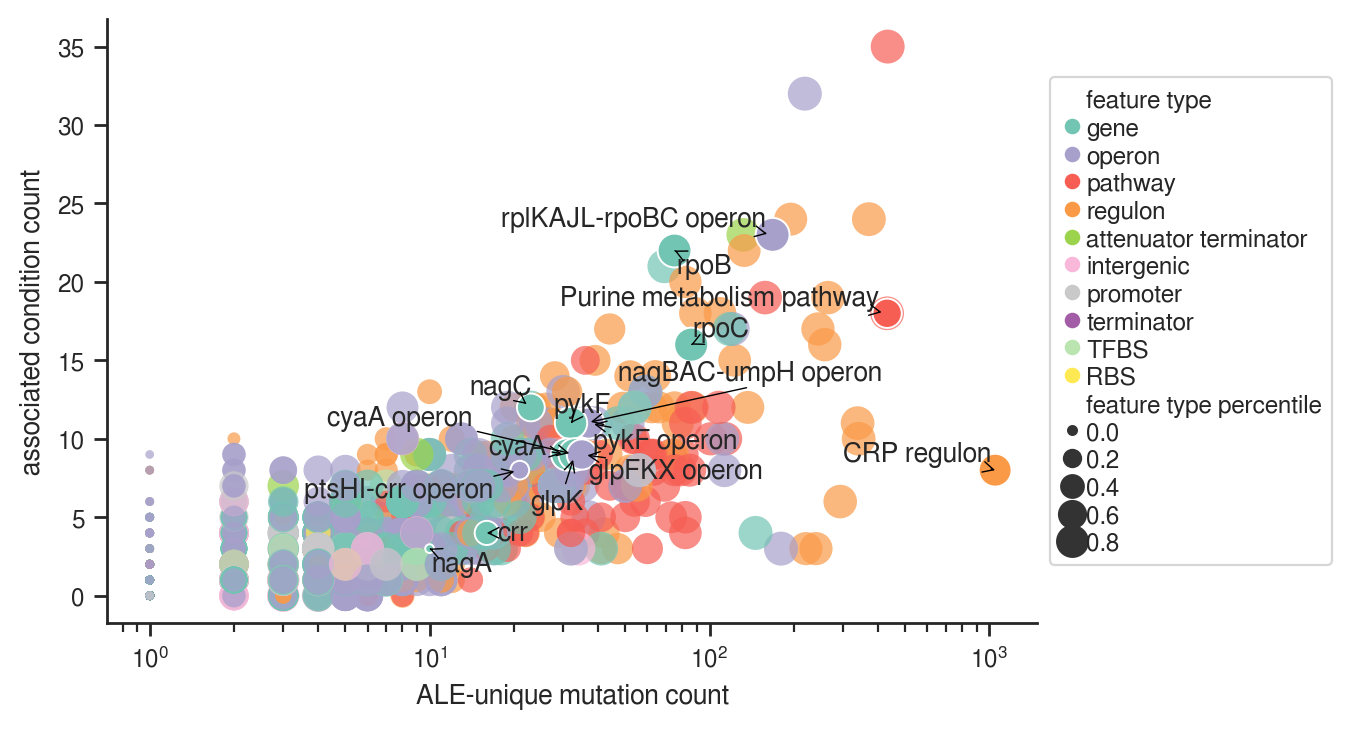

In [51]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


X_AXIS = "ALE-unique mutation count"
# X_AXIS = "average convergence"
Y_AXIS = "associated condition count"
SIZE = "feature type percentile"
sizes = (10,150)

# plt.figure(figsize=(4,3.5))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.7,
    sizes=sizes,
#     sizes={0:10, 1:100},
    palette=p,
#     legend="full"
)

# # To get the high-percentile dots plotted on the foreground
# sns.scatterplot(
#     data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
#     x=X_AXIS,
#     y="associated condition count",
#     hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     linewidth=0,
# #     alpha=0.8,
#     sizes={0:10, 1:100},
#     palette=p,
#     legend=False
# )

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
# ax.set_xlabel("average experiment convergence")
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))